In [7]:
from LogErrLoader import LoadDNDSLogErr
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from scipy.ndimage import uniform_filter1d

def windowed_std(arr, window_size:int):
    mean = uniform_filter1d(arr, size=window_size, mode='reflect')
    mean_sq = uniform_filter1d(arr**2, size=window_size, mode='reflect')
    std = np.sqrt(mean_sq - mean**2)
    return std

base = "NACA0012_H2-MGtest_2_VRes_AOA15.dir"
logs_AOA15 = os.listdir(base)
logs_AOA15.sort()
logs_AOA15 = list(filter(lambda s: s.endswith(".log")  ,logs_AOA15))
print(logs_AOA15)
data_AOA15 = []
data_AOA15_resMaxes = {}
for log in logs_AOA15:
    m = re.match(r"([\w-]+)_.log", log) 
    name = m.group(1)
    data = LoadDNDSLogErr(os.path.join(base, log))
    data_AOA15.append((data,name))
    for key in data:
        max_v = np.array(data[key]).max()
        if key.startswith("res"):
            data_AOA15_resMaxes[key] = max(data_AOA15_resMaxes[key],max_v) if key in data_AOA15_resMaxes.keys() else max_v


lwc = 1
msc = 1
markEvery = 30
markerList = (".","o","v","^","<",">","8","s","p","*","h","H","D","d","P","X")

def plotOne(data, label, plotIndex=0, xAxis="tWall", yAxis="res0", std = 0):
    dataY = np.array(data[yAxis][0:-1])
    if std > 0:
        dataY = windowed_std(dataY, std)
    if yAxis.startswith("res"):
        dataY /= data_AOA15_resMaxes[yAxis]
    plt.plot(
        data[xAxis][0:-1],
        dataY,
        label=label,
        lw=lwc,
        marker=markerList[plotIndex],
        markevery=markEvery,
        markersize = msc,
    )
    return plotIndex + 1


def plotAfter(xlim, xlabel="t", ylabel="res0", logy=True):
    if logy:
        plt.yscale("log")
    leg = plt.legend()
    plt.xlim(xlim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(visible=True, which="both", alpha=0.3)
series = ["all", "ilu", "lusgs", "gmres"]
tRanges = [250, 500, 700, 250]

['gmres5x1ilu-3ilu-3ilu_.log', 'gmres5x1ilu-3ilu_.log', 'gmres5x1ilu-4ilu-4ilu_.log', 'gmres5x1ilu-4ilu_.log', 'gmres5x1ilu_.log', 'ilu-3ilu-3ilu_.log', 'ilu-3ilu_.log', 'ilu-4ilu-4ilu_.log', 'ilu-4ilu_.log', 'ilu_.log', 'lusgs-3lusgs-3lusgs_.log', 'lusgs-3lusgs_.log', 'lusgs-4lusgs-4lusgs_.log', 'lusgs-4lusgs_.log', 'lusgs_.log']


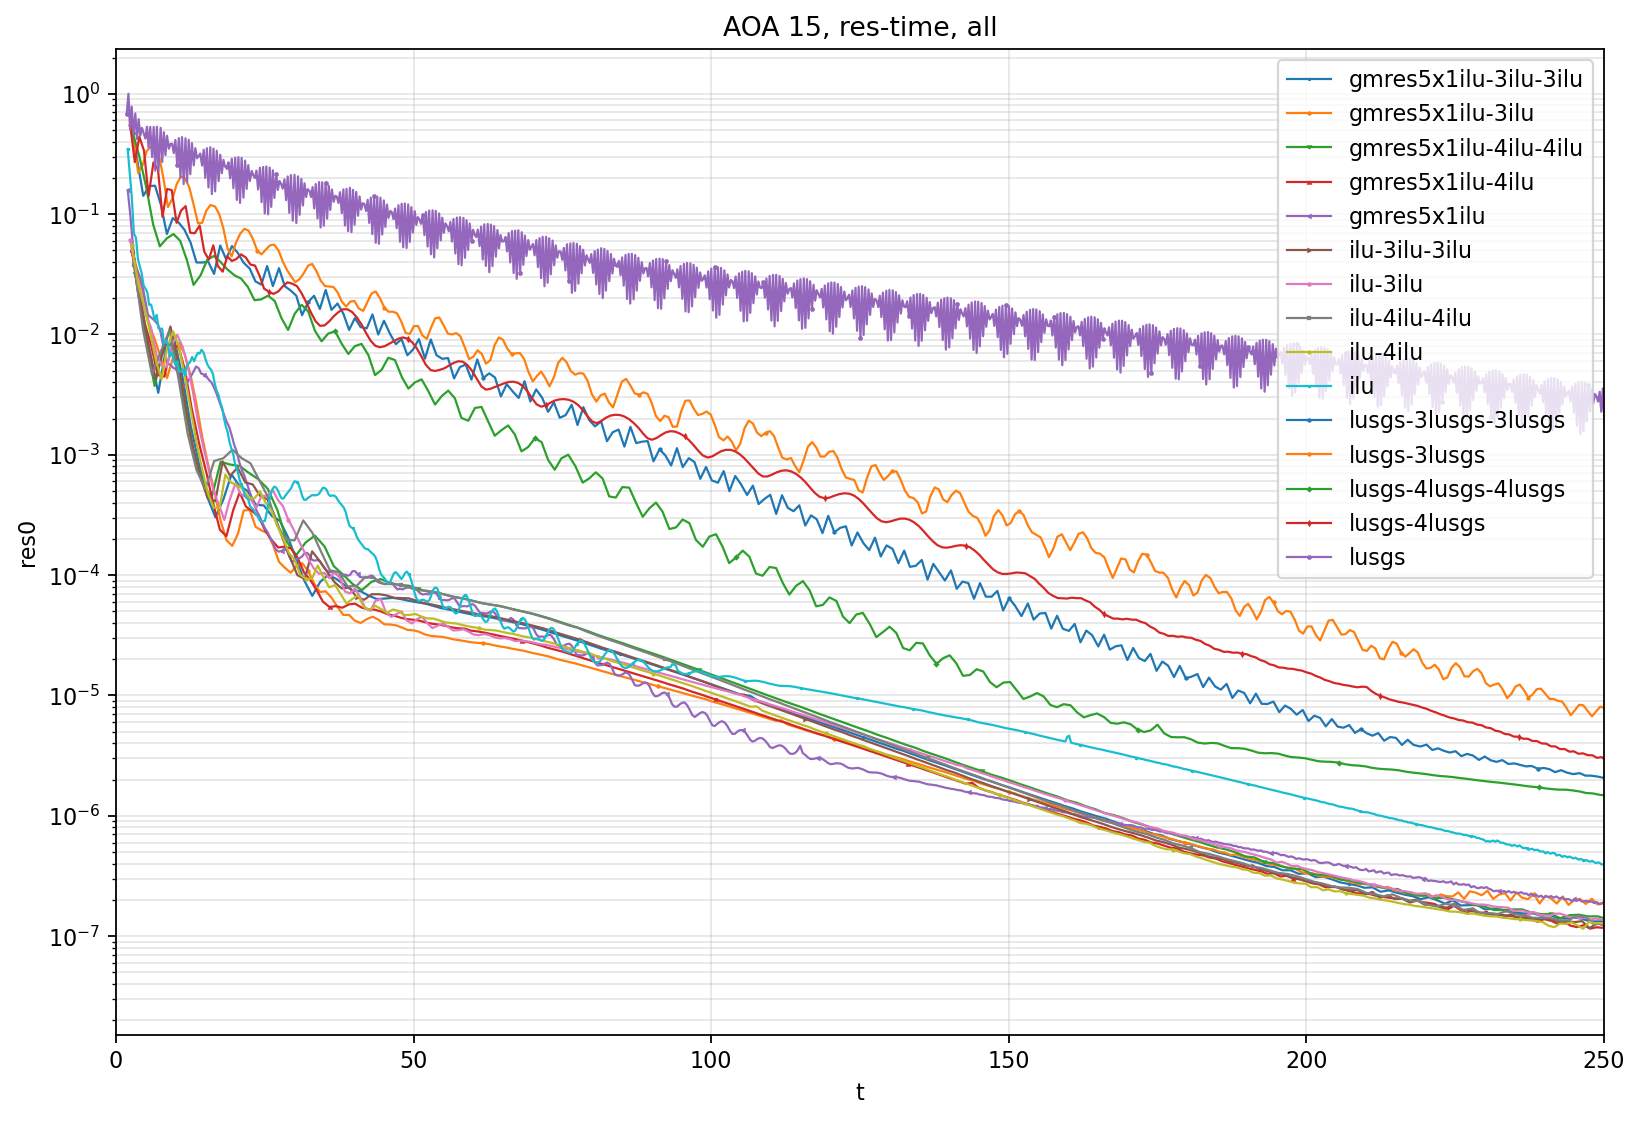

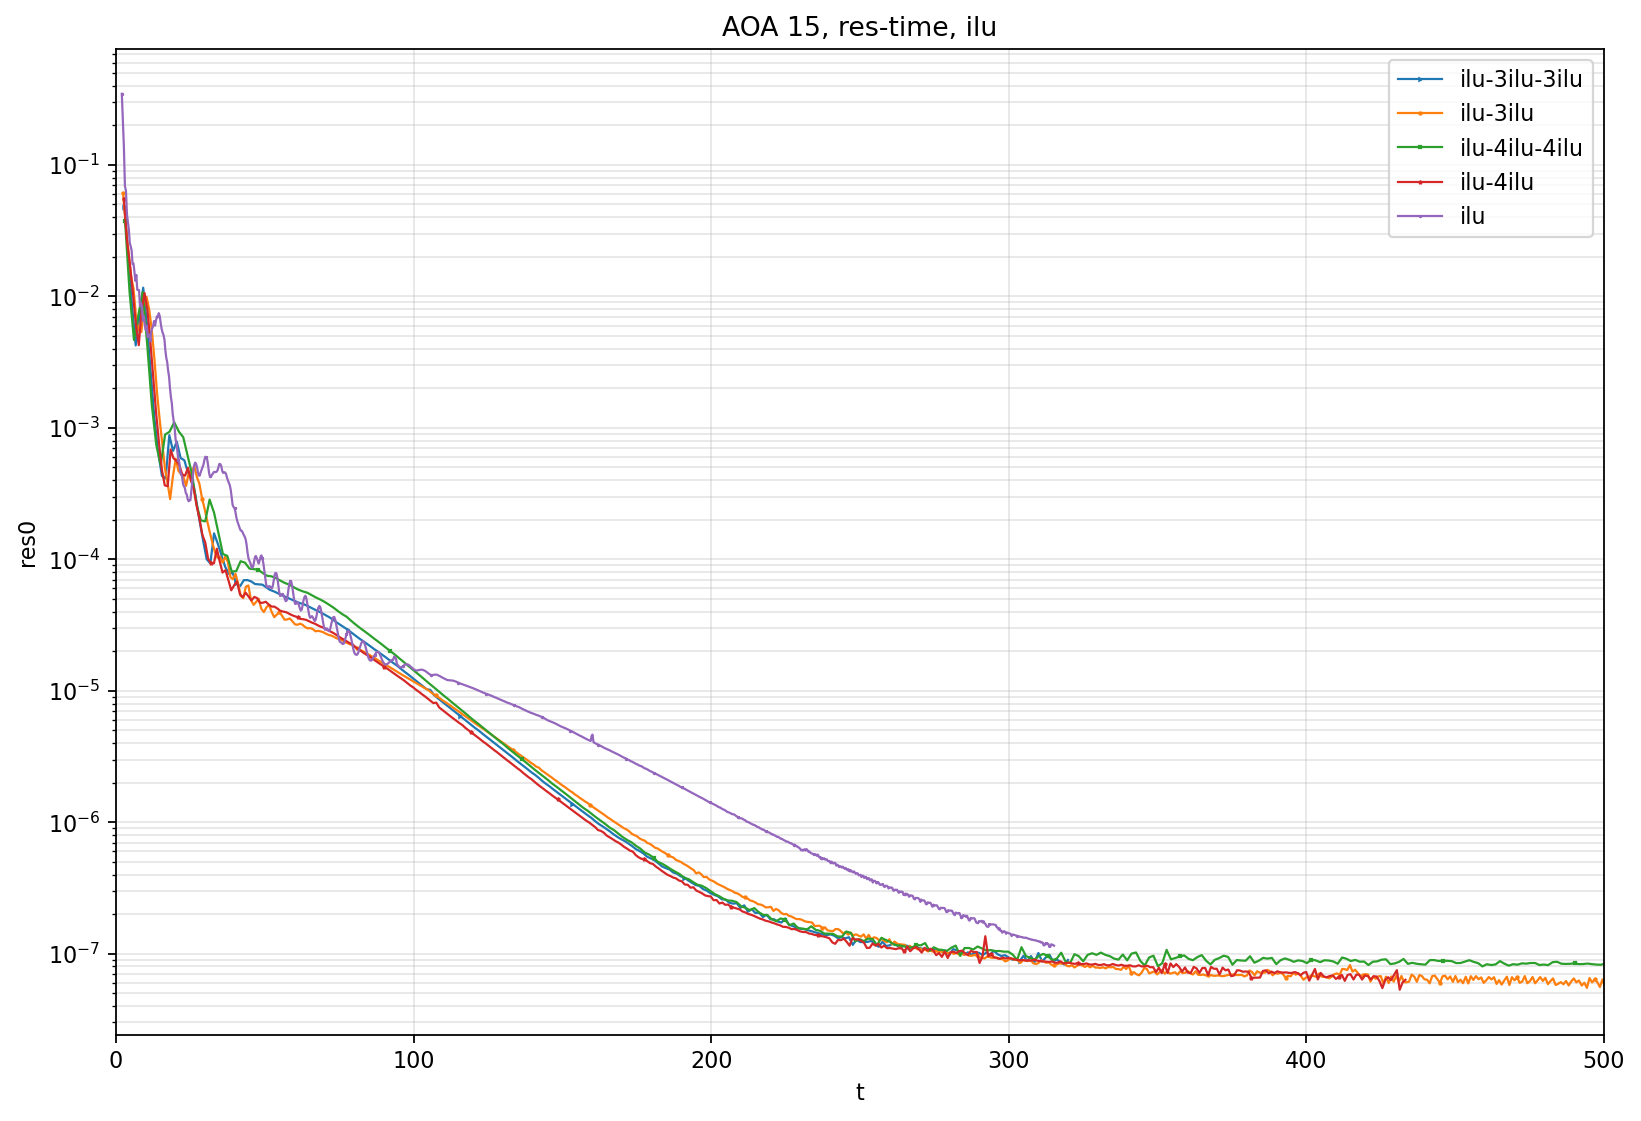

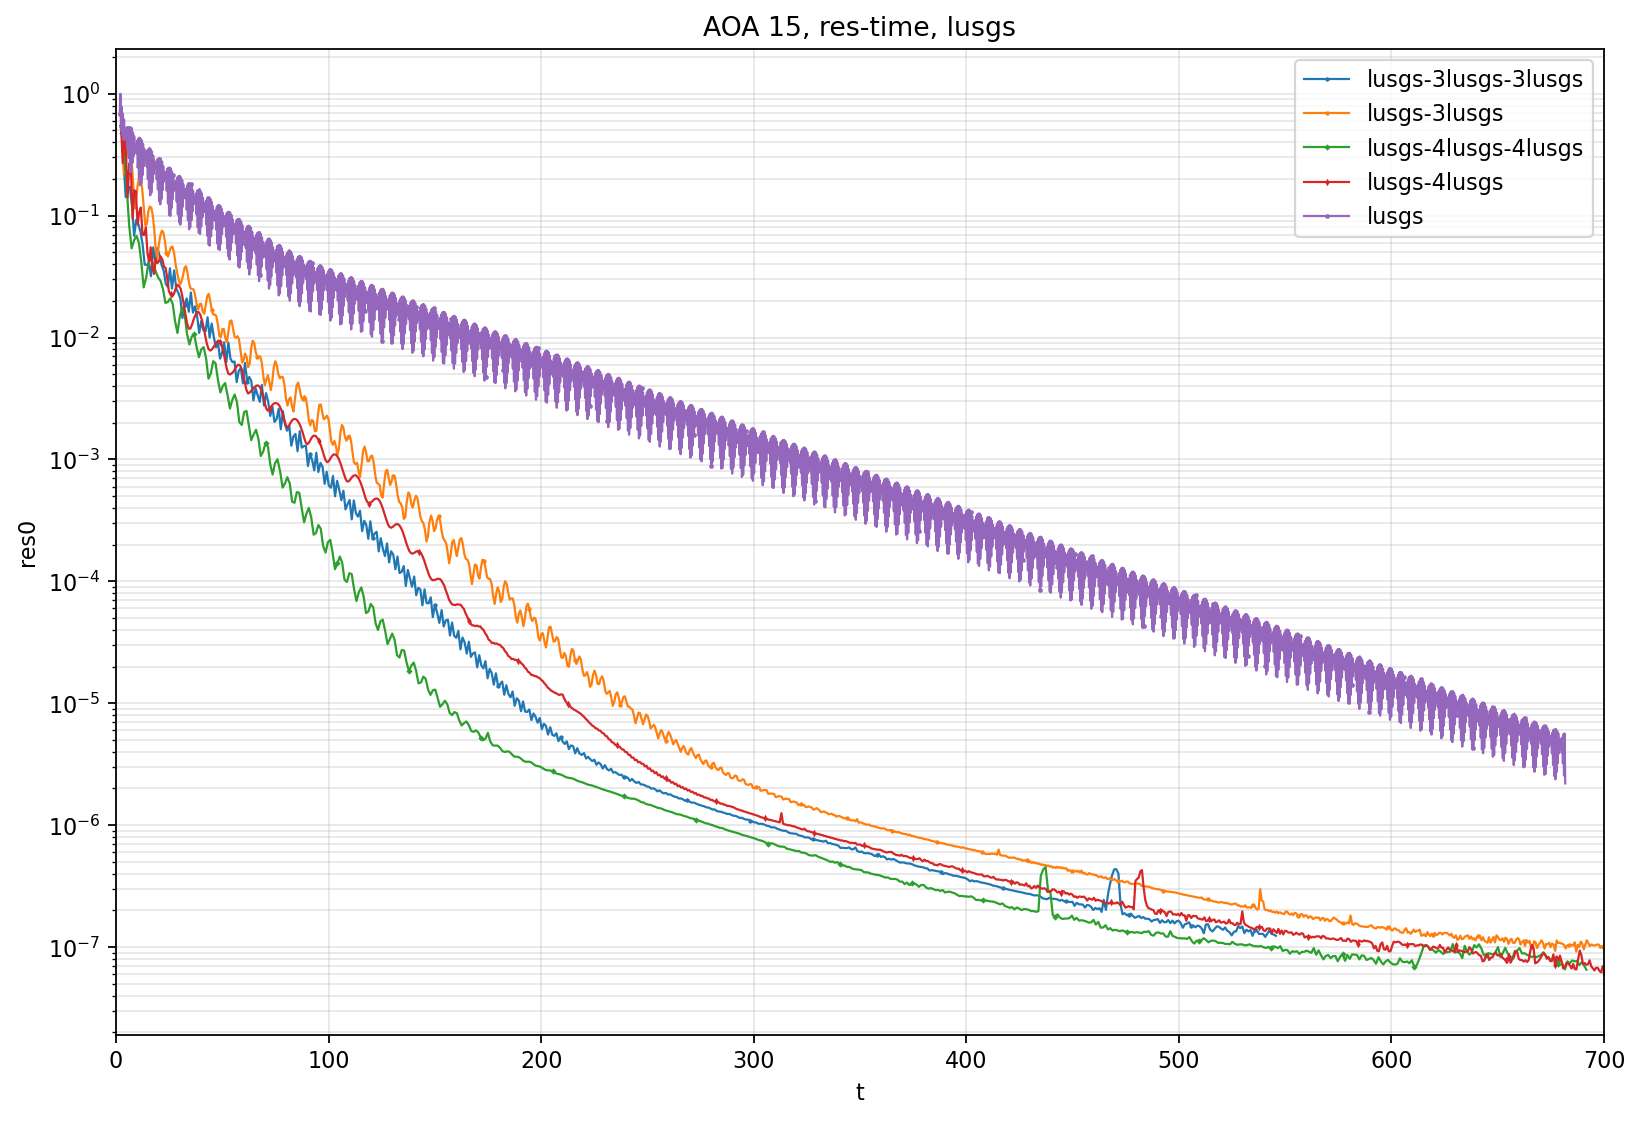

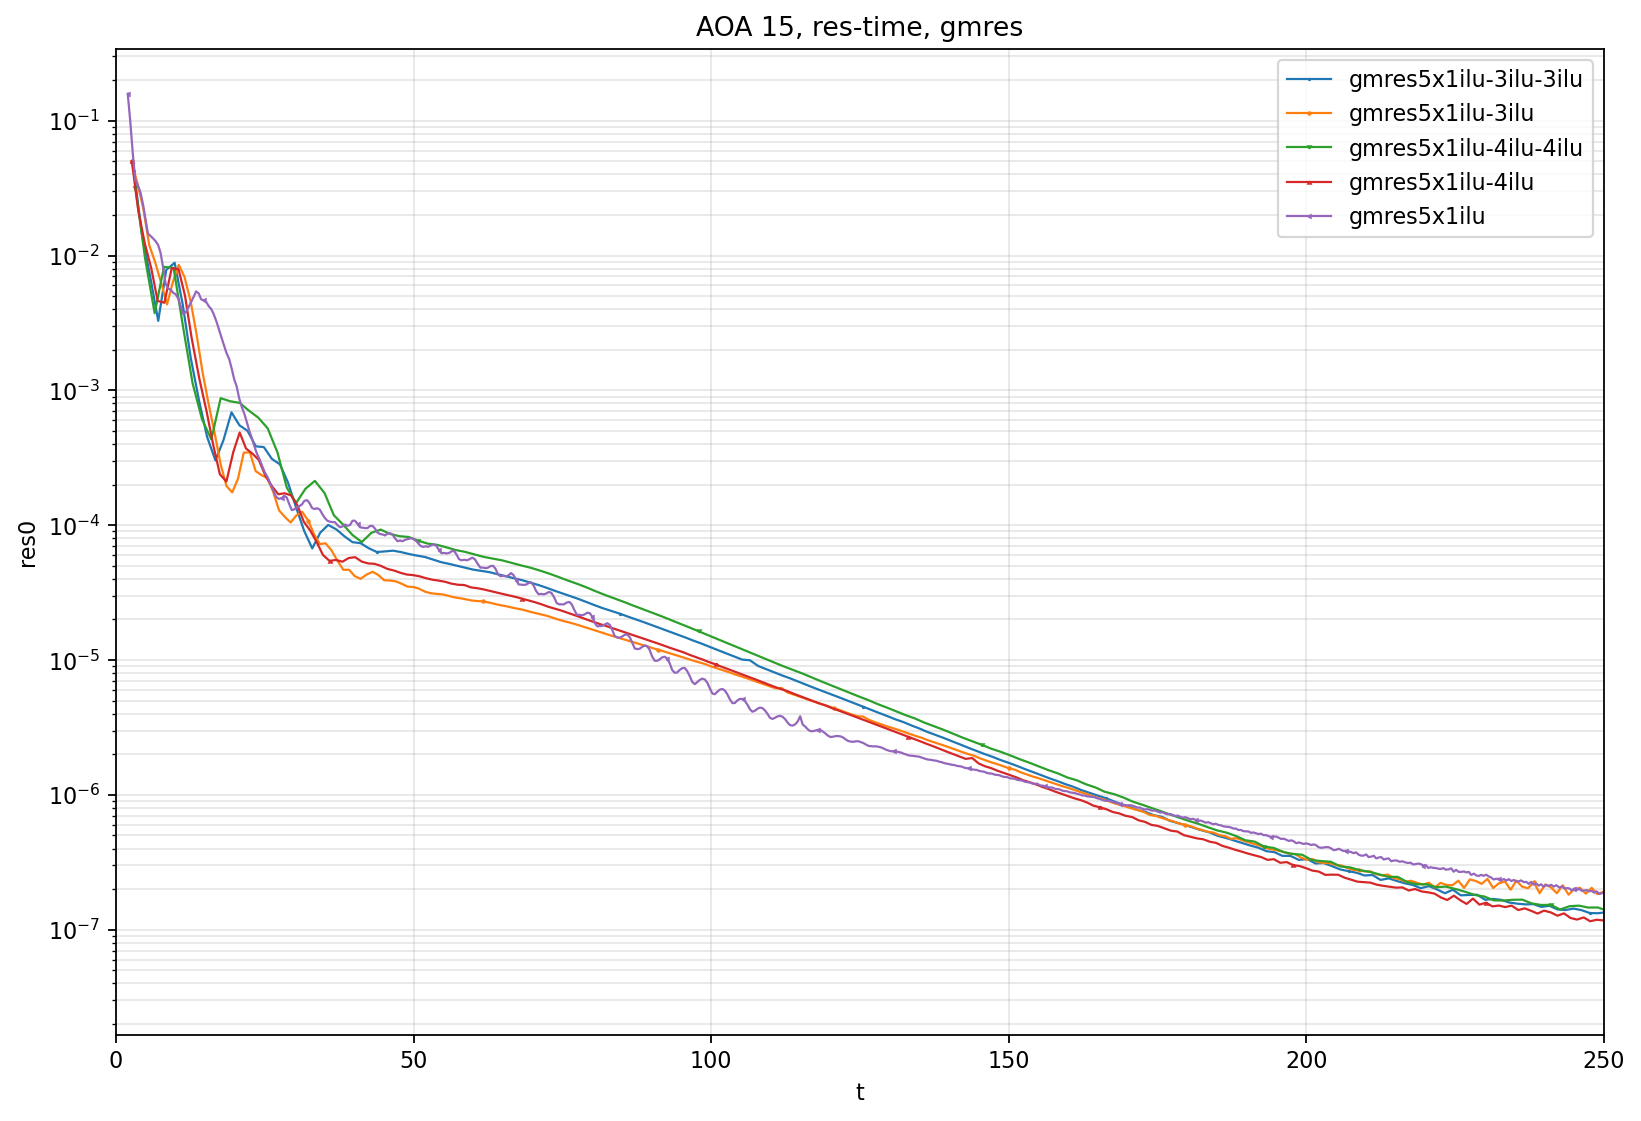

In [8]:
for ifig, subset in enumerate(series):
    if subset == "all":
        head = ""
    else:
        head = subset
        
    plt.figure(1003 + 10000*ifig,figsize=(12, 8), dpi=160)
    plt.title(f"AOA 15, res-time, {subset}")
    for i, (data, name) in enumerate(data_AOA15):
        if name.startswith(head):
            plotOne(data, name, i, xAxis="tWall", yAxis="res0")
    plotAfter((0,tRanges[ifig]), xlabel="t")
    plt.savefig(f"0012_MG_VRes_AOA15_rt_{subset}.png")

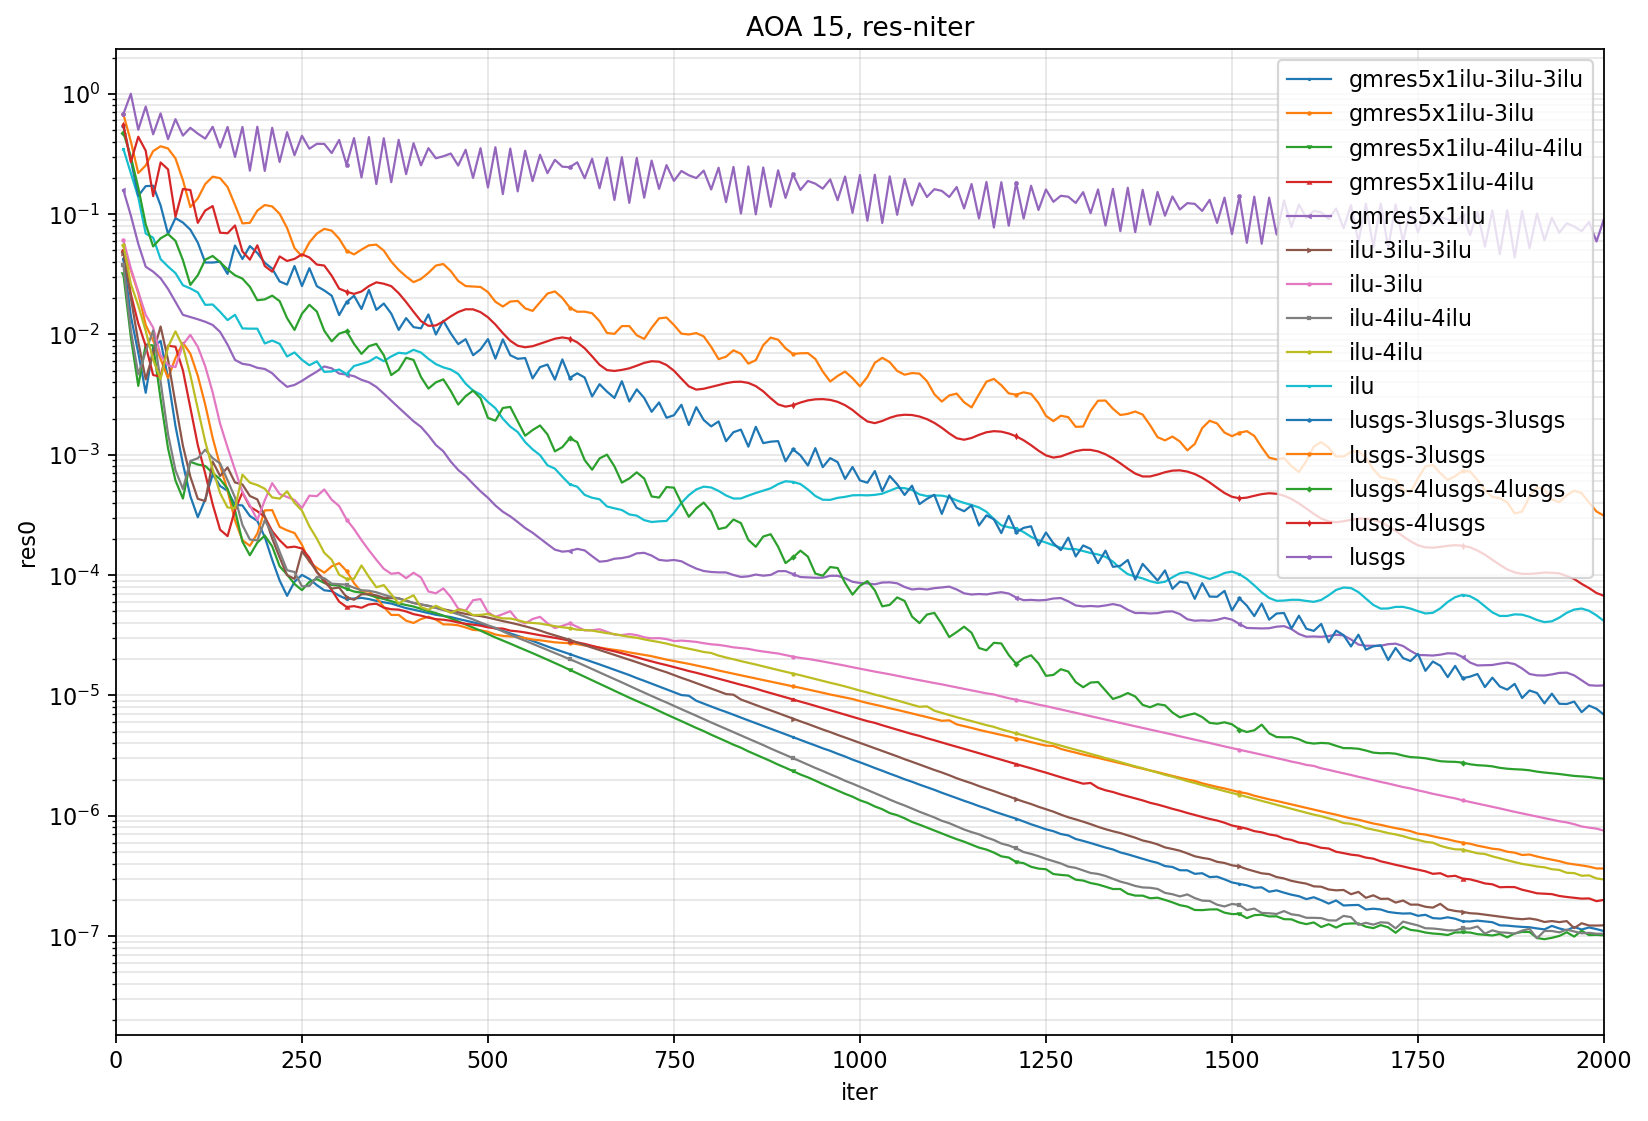

In [9]:
plt.figure(1004, figsize=(12, 8), dpi=160)
plt.title("AOA 15, res-niter")
for i, (data, name) in enumerate(data_AOA15):
    plotOne(data, name, i, xAxis="iter", yAxis="res0")
plotAfter((0, 2000), xlabel="iter")
plt.savefig(f"0012_MG_VRes_AOA15_ri_{"all"}.png")

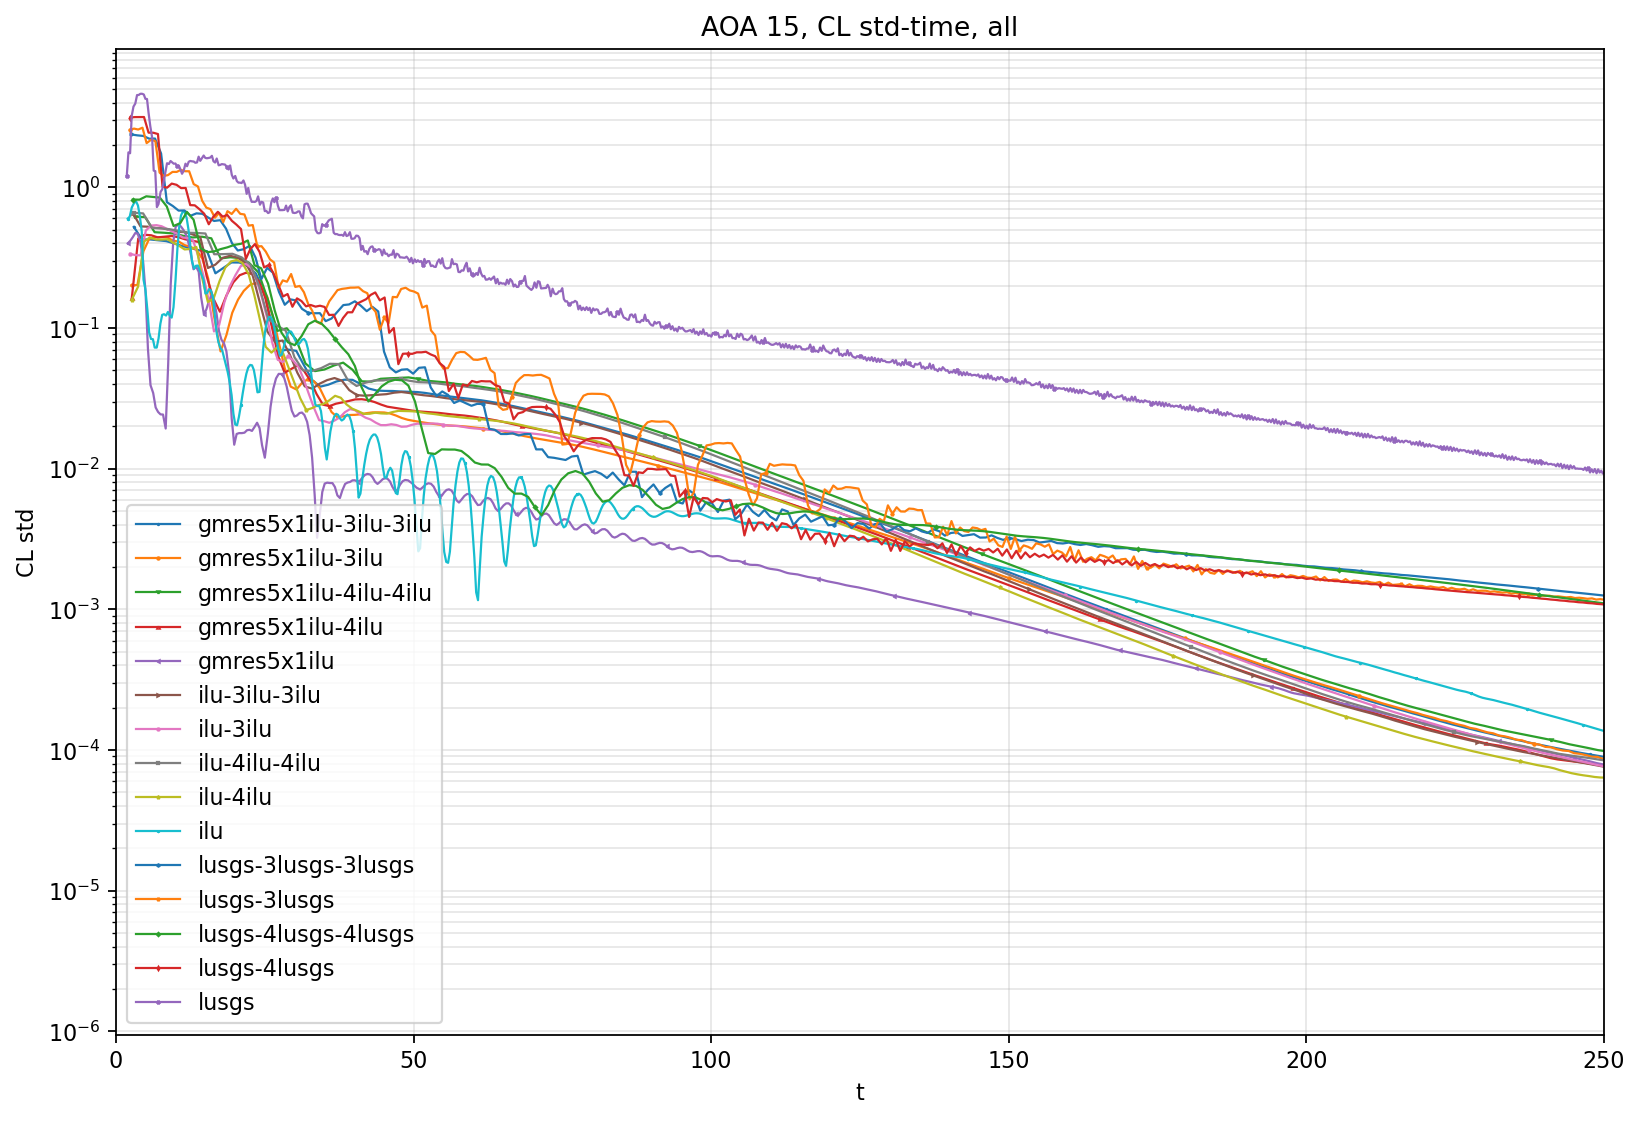

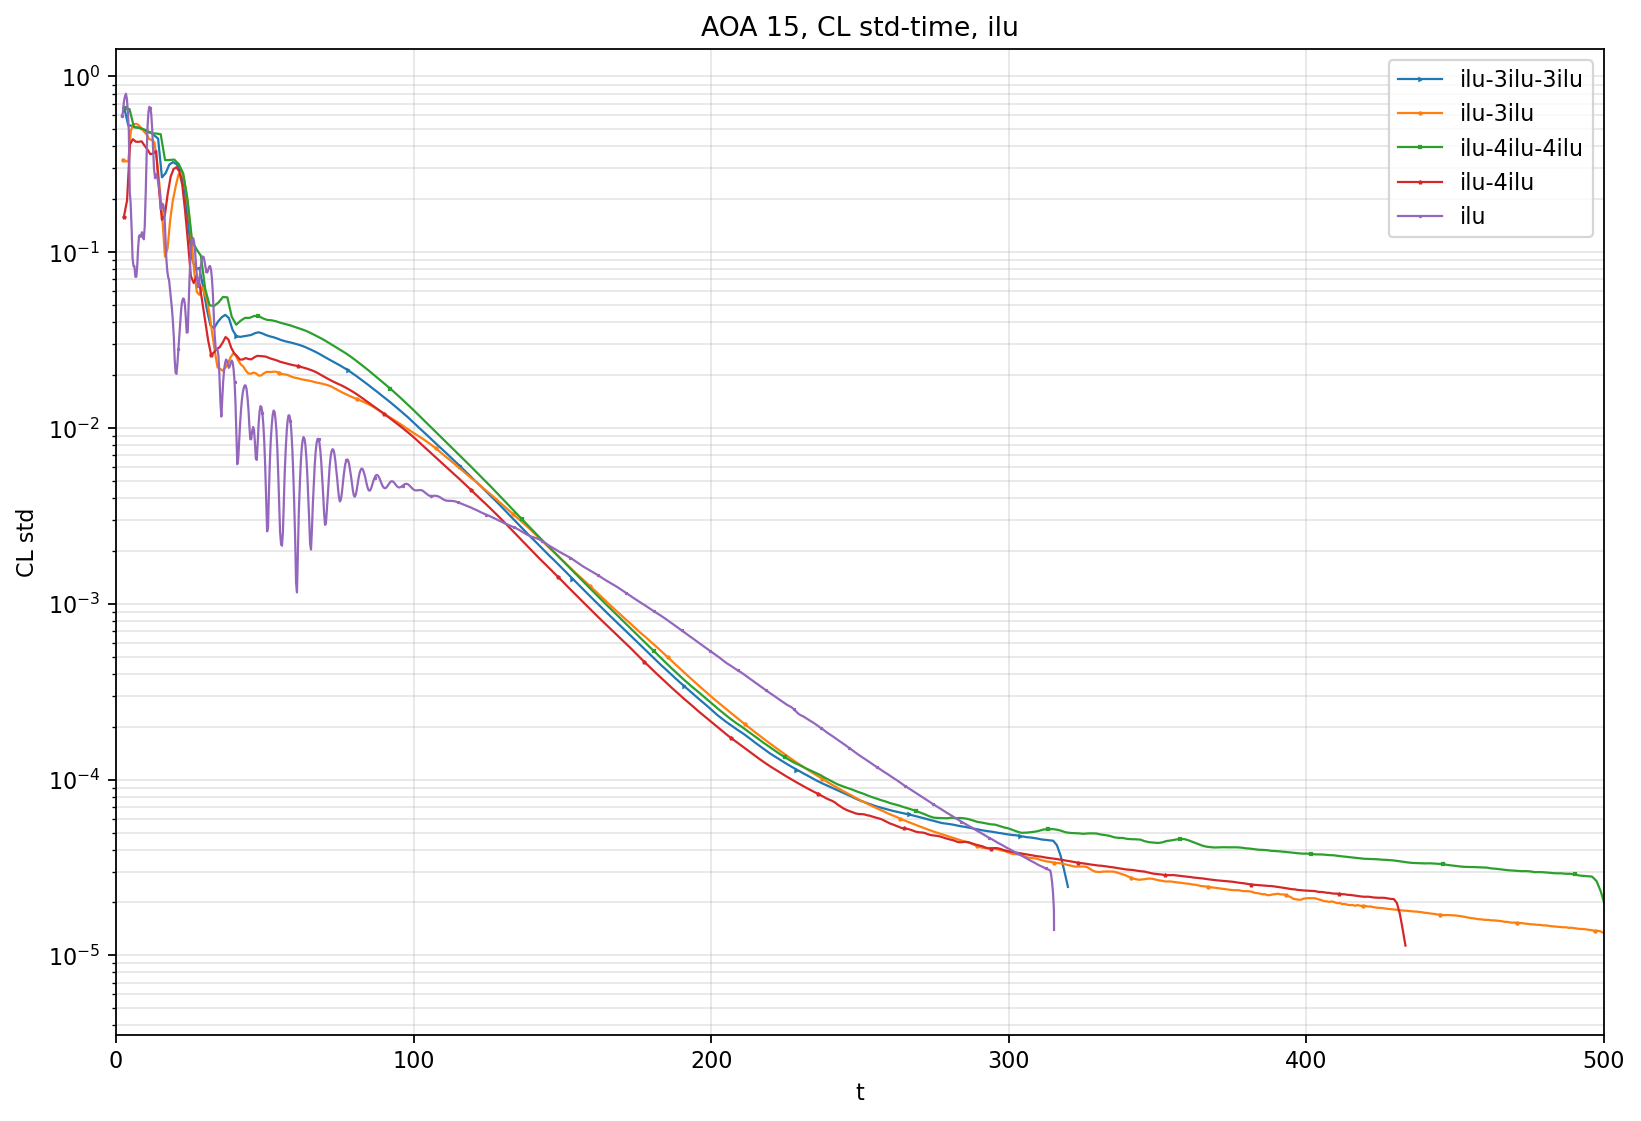

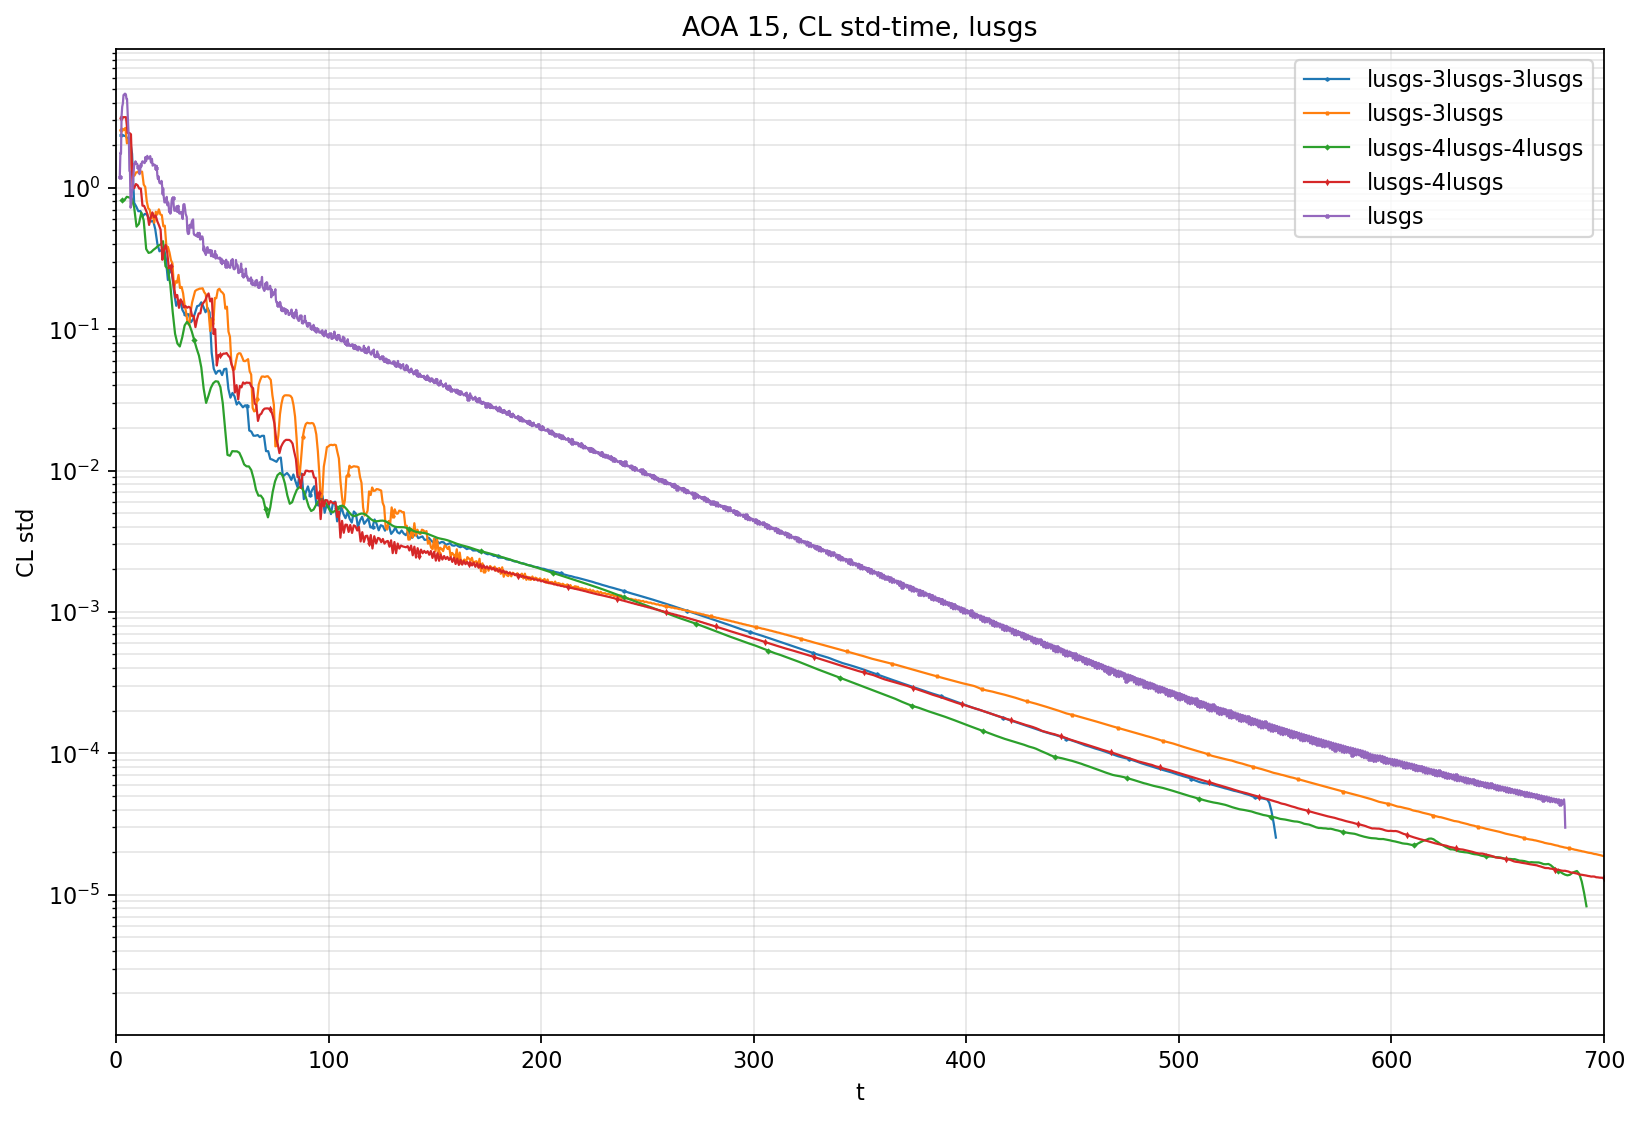

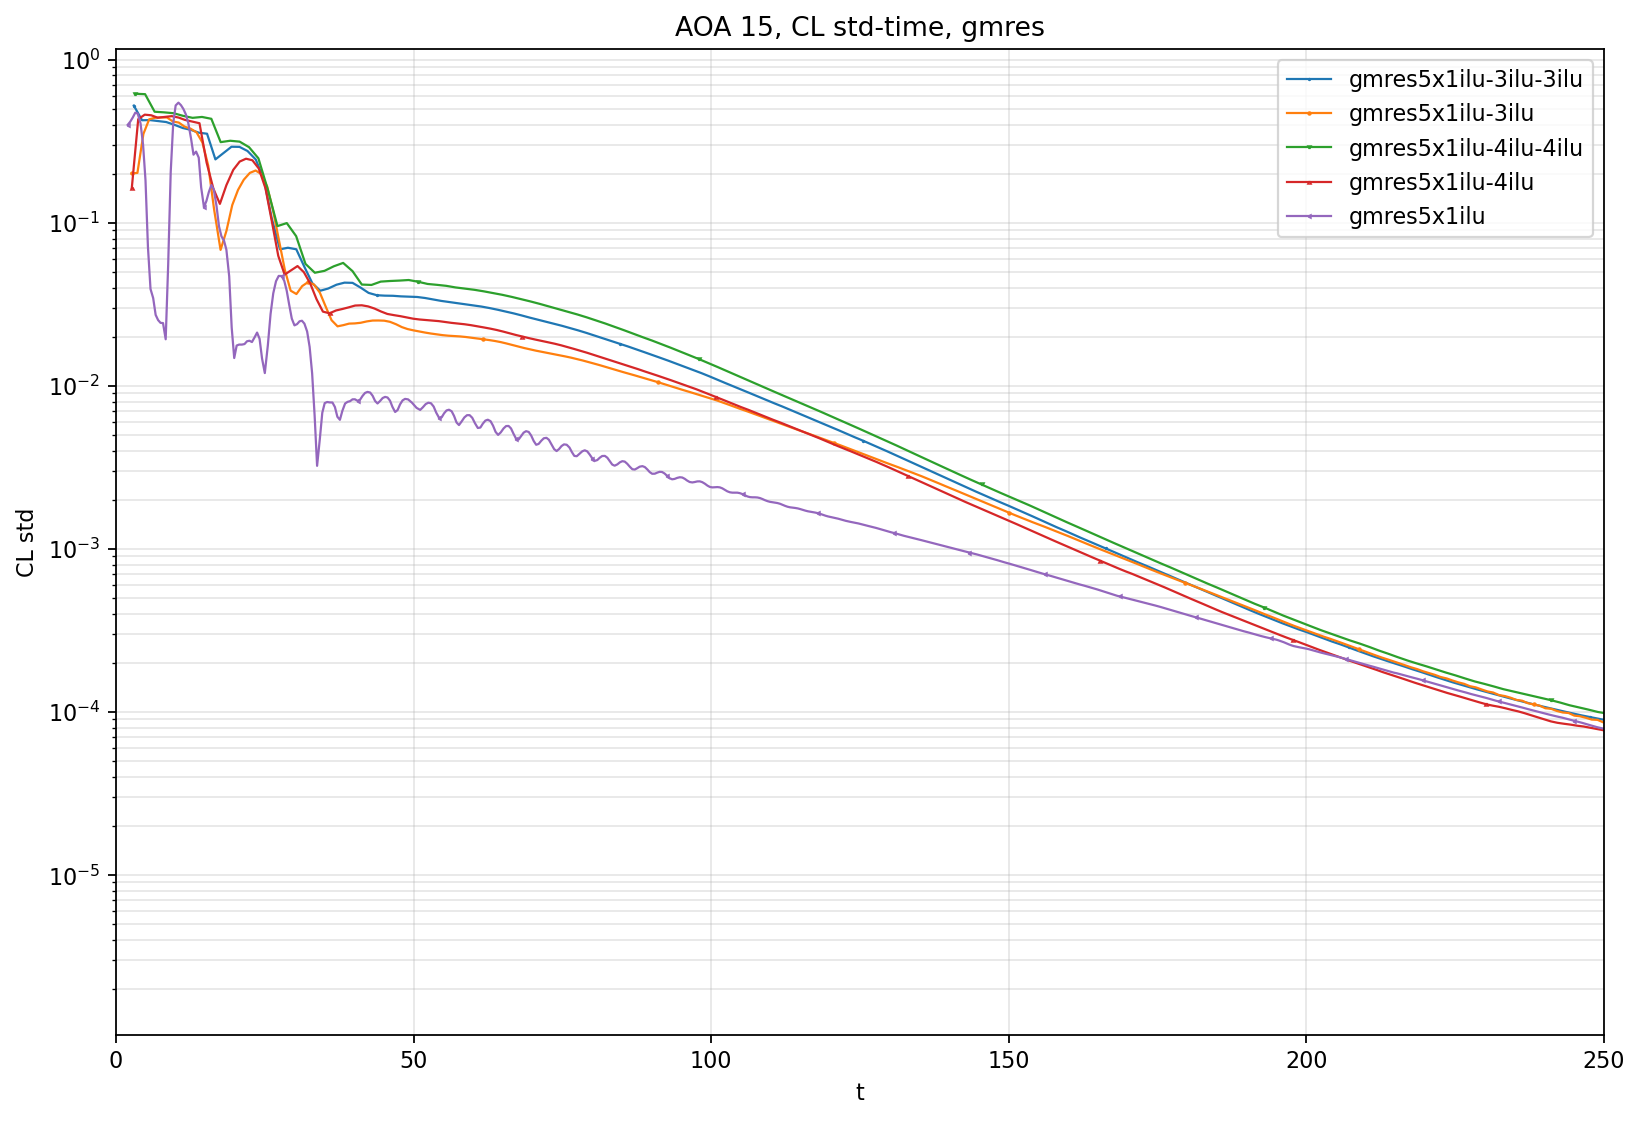

In [10]:
for ifig, subset in enumerate(series):
    if subset == "all":
        head = ""
    else:
        head = subset
        
    plt.figure(1005 + 10000*ifig,figsize=(12, 8), dpi=160)
    plt.title(f"AOA 15, CL std-time, {subset}")
    for i, (data, name) in enumerate(data_AOA15):
        if name.startswith(head):
            plotOne(data, name, i, xAxis="tWall", yAxis="CL", std=10)
    plotAfter((0,tRanges[ifig]), xlabel="t", ylabel= "CL std")
    plt.savefig(f"0012_MG_VRes_AOA15_clstdT_{subset}.png")
    